# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

# Data manipulation
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm

from IPython import get_ipython
ipython = get_ipython()

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

#import cufflinks as cf
#cf.go_offline(connected=True)
#cf.set_config_file(theme='white')


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

In [2]:
!head input.txt

forward 1
down 5
down 6
down 2
forward 8
up 3
up 2
down 2
forward 9
forward 7


In [3]:
direction = dict(forward=1,
                down=1j,
                up=-1j,
                )
traj = []
with open('input.txt','r') as fh:
    lines = fh.readlines()
    for line in lines:
        parts = line.split(' ')
        move = direction[parts[0]]*int(parts[1])
        traj.append(move)
traj = np.array(traj)

In [6]:
traj.sum().real*traj.sum().imag

1947824.0

In [8]:
import pandas as pd

In [9]:
traj = []
with open('input.txt','r') as fh:
    lines = fh.readlines()
    for line in lines:
        parts = line.split(' ')
        move = dict(forward=0,down=0,up=0)
        move[parts[0]] = int(parts[1])
        traj.append(move)
df = pd.DataFrame(traj)

In [24]:
df

,forward,down,up
0,1,0,0
1,0,5,0
2,0,6,0
3,0,2,0
4,8,0,0
...,...,...,...
995,0,8,0
996,0,0,7
997,0,2,0
998,0,6,0


In [14]:
aim_change=df.down-df.up

In [25]:
aim = aim_change.cumsum()


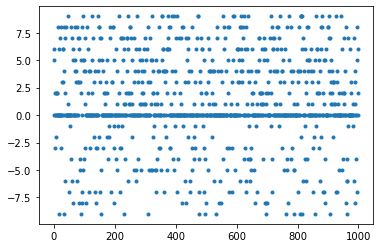

In [20]:
plt.plot(aim_change,'.')

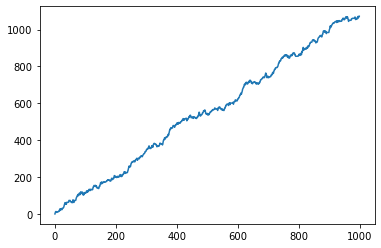

In [26]:
plt.plot(aim)

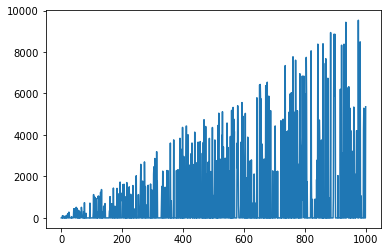

In [27]:
plt.plot(aim*df.forward)

In [30]:
(aim*df.forward).cumsum()

0           0
1           0
2           0
3           0
4         104
        ...  
995    992473
996    992473
997    992473
998    992473
999    997833
Length: 1000, dtype: int64

In [33]:
cs = (aim*df.forward).cumsum()

In [35]:
cs.iloc[-1]

997833

In [31]:
997833*(df.forward.sum())

1813062561